In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [24]:
ABS_PATH = os.path.abspath("")
IMG_PATH = os.path.join(ABS_PATH, "images")

imgs = [plt.imread(os.path.join(IMG_PATH, fname)) for fname in os.listdir(IMG_PATH) if fname.endswith("JPG") or fname.endswith("png")]

In [25]:
img = np.arange(400).reshape(20,20)
img = np.where(img%7==0, img, 0)
img += np.flip(img, axis=1) 

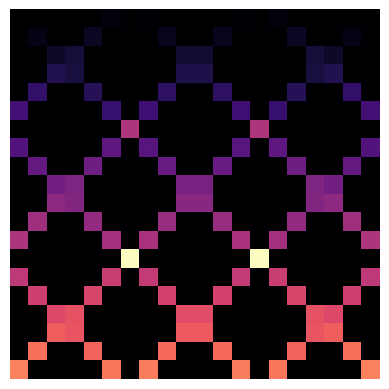

In [26]:
# img = imgs[1]
# img = cv2.resize(img, dsize=(1200, 800))
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap=plt.colormaps["magma"])
plt.axis("off");

$\displaystyle \hat{g}=\sum_{x=k}^{N-1-k}\sum_{y=k}^{M-1-k} \left(\sum_{i=0}^{k-1} \sum_{j=0}^{k-1}g(x+i,y+j)f(i,j)\right)$

$\displaystyle \hat{g}=\sum_{x=k}^{N-1-k}\sum_{y=k}^{M-1-k}\left(g(x,y)*f\right)$

Probability density function
$P(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$

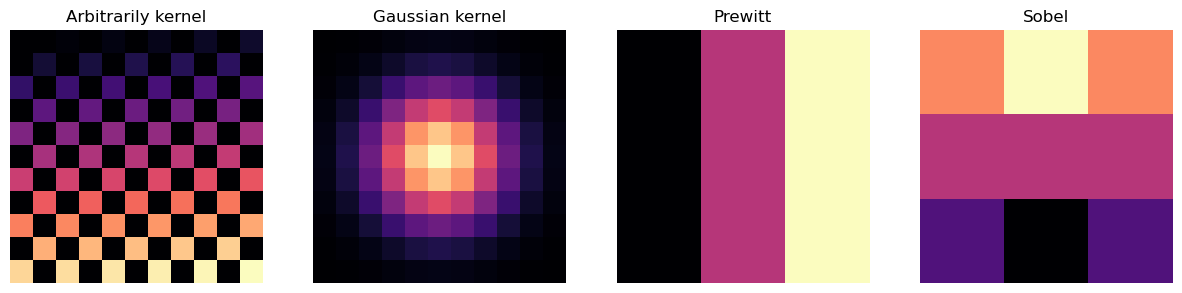

In [27]:
k = 11
def get_gaussian(x, mu=0, std=2):
    return 1/(std*(2*np.pi**0.5)) * np.exp(-(1/2)*((x-mu)/std)**2)


def convolve(frame, kernel):
    k = kernel.shape[0]
    x,y = frame.shape
    res = [frame[i:i+k,j:j+k] for i in range(x-k) for j in range(y-k)]
    res = np.array(res) * kernel
    res = res.reshape(x-k,y-k,k,k)
    return res.mean(axis=(2,3)) 

kernel = np.arange(k**2).reshape(k,k)
kernel = np.where(kernel%2,0,kernel)


a = np.arange(k)-int(k/2)
x, y = np.meshgrid(a, a)
kernel_gaussian = get_gaussian(x) * get_gaussian(y)
kernel_prewitt = np.array([-1,0,1] * 3).reshape(3,3) * 1/3
kernel_sobel = np.array([-1,0,1] * 3).reshape(3,3)
kernel_sobel[1, :] *= 2
kernel_sobel = 1/4 * np.flip(kernel_sobel.T)


kernels = [kernel, kernel_gaussian, kernel_prewitt, kernel_sobel]
text = ["Arbitrarily kernel", "Gaussian kernel", "Prewitt", "Sobel"]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,5))
for i, (ax, k) in enumerate(zip(axes, kernels)):
    ax.imshow(k, cmap=plt.colormaps["magma"])
    ax.axis("off");
    ax.set_title(text[i])

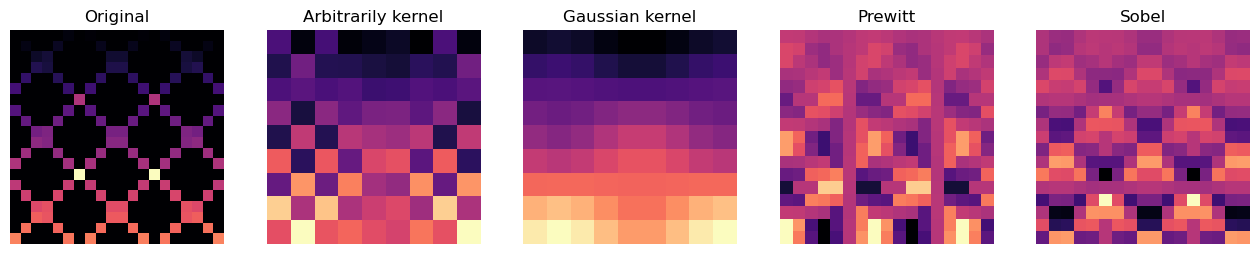

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,10))

axes[0].imshow(img, cmap=plt.colormaps["magma"])
axes[0].axis("off");
axes[0].set_title("Original")

for i, (ax, k) in enumerate(zip(axes[1:], kernels)):
    ax.imshow(convolve(img, k), plt.colormaps["magma"])
    ax.axis("off");
    ax.set_title(text[i])